In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
train_data=pd.read_csv('train.csv')
train_data.head()
x=train_data.drop(['financial_institution','loan_id','origination_date','first_payment_date','number_of_borrowers'],axis=1)
x.isnull().sum()
X1=x.drop('m13',axis=1)
y=x['m13']

In [3]:
X1=pd.get_dummies(X1)
X1.head()

,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,debt_to_income_ratio,borrower_credit_score,insurance_percent,co-borrower_credit_score,insurance_type,m1,...,m9,m10,m11,m12,source_X,source_Y,source_Z,loan_purpose_A23,loan_purpose_B12,loan_purpose_C86
0,4.250,214000,360,95,22.0,694.0,30.0,0.0,0.0,0,...,0,0,0,0,0,0,1,0,0,1
1,4.875,144000,360,72,44.0,697.0,0.0,0.0,0.0,0,...,0,0,1,0,0,1,0,0,1,0
2,3.250,366000,180,49,33.0,780.0,0.0,0.0,0.0,0,...,0,0,0,0,0,0,1,0,1,0
3,4.750,135000,360,46,44.0,633.0,0.0,638.0,0.0,0,...,1,1,1,1,1,0,0,0,1,0
4,4.750,124000,360,80,43.0,681.0,0.0,0.0,0.0,0,...,8,9,10,11,1,0,0,0,0,1


In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X1,y,test_size=0.20,random_state=400)

In [8]:
clf=RandomForestClassifier(n_estimators=80,oob_score=True,n_jobs=-1,random_state=400)

In [9]:
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=-1,
            oob_score=True, random_state=400, verbose=0, warm_start=False)

In [10]:
clf.oob_score_

0.995907201171833

In [11]:
for w in range(10,150,20):
    clf=RandomForestClassifier(n_estimators=w,oob_score=True,n_jobs=-1,random_state=400)
    clf.fit(X_train,y_train)
    oob=clf.oob_score_
    print('For n_estimators = '+str(w))
    print('OOB score is '+str(oob))
    print('************************')

E:\anaconda\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


For n_estimators = 10
OOB score is 0.9952286582082157
************************
For n_estimators = 30
OOB score is 0.995907201171833
************************
For n_estimators = 50
OOB score is 0.9958748896021369
************************
For n_estimators = 70
OOB score is 0.995907201171833
************************
For n_estimators = 90
OOB score is 0.9959825948344571
************************
For n_estimators = 110
OOB score is 0.9960041358809211
************************
For n_estimators = 130
OOB score is 0.9960364474506171
************************


In [13]:
#Finalize 110 trees
clf=RandomForestClassifier(n_estimators=110,oob_score=True,n_jobs=-1,random_state=400)

In [14]:
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=110, n_jobs=-1,
            oob_score=True, random_state=400, verbose=0, warm_start=False)

In [15]:
clf.oob_score_


0.9960041358809211

In [17]:
clf.feature_importances_
imp_feat=pd.Series(clf.feature_importances_,index=X1.columns.tolist())
imp_feat.sort_values(ascending=False)

m12                         0.168421
unpaid_principal_bal        0.116528
borrower_credit_score       0.105835
debt_to_income_ratio        0.081627
m11                         0.078896
loan_to_value               0.073569
interest_rate               0.069550
co-borrower_credit_score    0.047055
m9                          0.039557
m10                         0.037709
m7                          0.022522
m8                          0.022218
loan_term                   0.018787
source_Y                    0.011289
loan_purpose_B12            0.010946
source_X                    0.010897
m4                          0.010844
loan_purpose_A23            0.010626
m6                          0.010615
insurance_percent           0.010608
m5                          0.009900
loan_purpose_C86            0.009357
source_Z                    0.007070
m2                          0.005243
m1                          0.005120
m3                          0.003599
insurance_type              0.001612
d

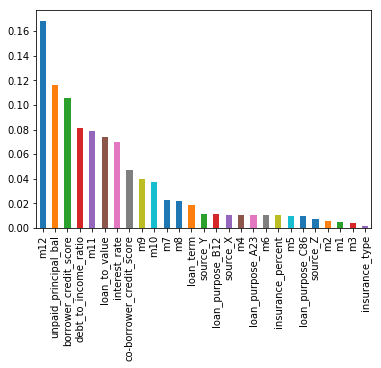

In [18]:
imp_feat.sort_values(ascending=False).plot(kind='bar')

In [30]:
test_data=pd.read_csv('test.csv')
test=test_data.drop(['financial_institution','origination_date','first_payment_date','number_of_borrowers','loan_id'],axis=1)
test=pd.get_dummies(test)
test.head()

,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,debt_to_income_ratio,borrower_credit_score,insurance_percent,co-borrower_credit_score,insurance_type,m1,...,m9,m10,m11,m12,source_X,source_Y,source_Z,loan_purpose_A23,loan_purpose_B12,loan_purpose_C86
0,3.875,417000,360,75,20,790,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,4.500,113000,360,80,33,793,0,784,0,0,...,0,0,0,0,1,0,0,0,0,1
2,4.500,72000,360,75,34,710,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,4.125,123000,180,41,24,798,0,813,0,0,...,0,0,0,0,1,0,0,1,0,0
4,3.250,166000,180,53,12,767,0,768,0,0,...,0,0,0,0,1,0,0,1,0,0


In [31]:
output=test

In [32]:
output.head()

,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,debt_to_income_ratio,borrower_credit_score,insurance_percent,co-borrower_credit_score,insurance_type,m1,...,m9,m10,m11,m12,source_X,source_Y,source_Z,loan_purpose_A23,loan_purpose_B12,loan_purpose_C86
0,3.875,417000,360,75,20,790,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,4.500,113000,360,80,33,793,0,784,0,0,...,0,0,0,0,1,0,0,0,0,1
2,4.500,72000,360,75,34,710,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,4.125,123000,180,41,24,798,0,813,0,0,...,0,0,0,0,1,0,0,1,0,0
4,3.250,166000,180,53,12,767,0,768,0,0,...,0,0,0,0,1,0,0,1,0,0


In [33]:
output['m13']=clf.predict(test)

In [34]:
output.head()

,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,debt_to_income_ratio,borrower_credit_score,insurance_percent,co-borrower_credit_score,insurance_type,m1,...,m10,m11,m12,source_X,source_Y,source_Z,loan_purpose_A23,loan_purpose_B12,loan_purpose_C86,m13
0,3.875,417000,360,75,20,790,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
1,4.500,113000,360,80,33,793,0,784,0,0,...,0,0,0,1,0,0,0,0,1,0
2,4.500,72000,360,75,34,710,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,4.125,123000,180,41,24,798,0,813,0,0,...,0,0,0,1,0,0,1,0,0,0
4,3.250,166000,180,53,12,767,0,768,0,0,...,0,0,0,1,0,0,1,0,0,0


In [35]:
output.to_csv('op.csv')